In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install --upgrade pandas

data_train = pd.read_csv('dataset/train.csv', encoding='utf-8')
data_test = pd.read_csv('dataset/test.csv', encoding='utf-8')
#data_train['tweet'] = data_train['tweet'].encode('ascii', 'ignore').decode('ascii')

In [53]:
#!pip3 install nltk
#!pip3 install textblob
#import emoji
import re
import string
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.tokenize import TweetTokenizer

def clean_text(text):
    #stemmer = nltk.SnowballStemmer("english")
    stopword=set(stopwords.words('english'))
    text = str(text).lower()
    #text = re.sub('â', '', text)
    #text = re.sub('ð', '', text)
    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])', '', text)
    text = re.sub('\d+','',text)
    text = re.sub(r'[^\w\s]','',text)
    #text = re.sub('@user', '', text)
    #text = re.sub("^\'", '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    '''
    text = re.sub('[^\x00-\x7f]', '', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    '''
    
    #text = [word for word in text.split(' ') if word not in stopword]
    #text = " ".join(text)
    #text = [word for word in text.split(' ') if word not in string.punctuation]
    #text = " ".join(text)
    
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text

from nltk.tokenize import TweetTokenizer

def proc_tokenizer(tweet):
    #Tokenization refers to dividing the text into a sequence of words or sentences.
    tknzr = TweetTokenizer(strip_handles=True)
    tweet_token = tweet.apply(lambda x: tknzr.tokenize(x))
    return tweet_token

def stop_words_punctuations(tweet):
    stop = stopwords.words("english")
    #tweet_wostop = tweet.apply(lambda x: [i.lower() for i in x if i not in stop])
    #tweet_wostop_punct = tweet_wostop.apply(lambda x: [i.lower() for i in x 
    #                        if i not in string.punctuation and len(i) > 3])
    tweet_wostop_punct = tweet.apply(lambda x: [i.lower() for i in x if i not in stop
                and i not in string.punctuation and len(i) > 3])
    return tweet_wostop_punct

def stemnlemm(tweet):
    #Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.
    #Lemmatization is the process of converting a word to its base form.
    st = PorterStemmer()
    tweet_stemn = tweet.apply(lambda x: [Word(st.stem(i)).lemmatize() for i in x])
    return tweet_stemn

def preprocessing_tweets(tweet, stemming_word = False):
    from textblob import Word
    tweet = tweet.apply(lambda x: clean_text(x))
    tweet = proc_tokenizer(tweet)
    tweet = stop_words_punctuations(tweet)
    if stemming_word:
        tweet = stemnlemm(tweet)
    return tweet
'''
tweets_wostop_punt = data_train['tweet'].apply(lambda x: clean_text(x))
print('----clean_text----\n', tweets_wostop_punt[0:5])
tweets_wostop_punt = tokenizer(tweets_wostop_punt)
print('----tokenizer----\n', tweets_wostop_punt[0:5])
tweets_wostop_punt = stop_words_punctuations(tweets_wostop_punt)
print('----stop_words_punctuations----\n', tweets_wostop_punt[0:5])
'''    
preproc_tweets = preprocessing_tweets(data_train['tweet'])

wostop_punt_noracist = preproc_tweets[np.array(data_train['label']) == 0].tolist()
wostop_punt_racist = preproc_tweets[np.array(data_train['label']) == 1].tolist()
print(wostop_punt_noracist[0:5])
#['father dysfunctional selfish drags kids dysfunction run', 'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked', 'bihday majesty', 'model love u take u time ur', 'factsguide society motivation']
print('...............')
print(wostop_punt_racist[0:5])
print('...............')

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction'], ['thanks', 'lyft', 'credit', 'cant', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'disapointed', 'getthanked'], ['bihday', 'majesty'], ['model', 'love', 'take', 'time'], ['factsguide', 'society', 'motivation']]
...............
[['calls', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot'], ['comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins'], ['retweet', 'agree'], ['lumpy', 'says', 'prove', 'lumpy'], ['unbelievable', 'century', 'need', 'something', 'like', 'neverump', 'xenophobia']]
...............


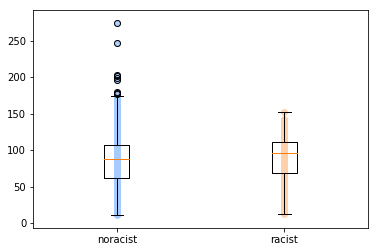

In [42]:
vals_noracist = [len(t) for t in data_train['tweet'][data_train['label'] == 0]]
vals_racist = [len(t) for t in data_train['tweet'][data_train['label'] == 1]]
#print(len(vals_noracist), len(vals_racist))
plt.figure()
plt.boxplot([vals_noracist, vals_racist], labels=['noracist', 'racist'])
plt.scatter([1]*len(vals_noracist), vals_noracist, alpha=0.9, color='#a8cbfe')
plt.scatter([2]*len(vals_racist), vals_racist, alpha=0.9, color='#fed1aa')
plt.show()


In [54]:
#https://www.kaggle.com/matyasmacudzinski/sentiment-analysis-using-bert
#import torch
#from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
X_processed = preprocessing_tweets(data_train['tweet'], stemming_word=True)
X_processed = X_processed.apply(lambda x: ' '.join(x))
X_processed = np.array(X_processed.tolist())
Y_train = np.array(data_train['label'].tolist())
print(type(X_processed), type(Y_train))
print(X_processed[0:3],'\n--------------\n', Y_train[0:3])

x_train, x_test, y_train, y_test = train_test_split(X_processed, Y_train, test_size=0.3)
print('---x_train---\n', x_train.shape, y_train.shape)
print('---y_train---\n', x_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
['father dysfunct selfish drag kid dysfunct'
 'thank lyft credit cant caus dont offer wheelchair van disapoint getthank'
 'bihday majesti'] 
--------------
 [0 0 0]
---x_train---
 (22373,) (22373,)
---y_train---
 (9589,) (9589,)


In [4]:
from sklearn.utils import resample
x_oversampled, y_oversampled = resample(x_train[y_train==1], y_train[y_train==1], replace=True,     # sample with replacement
                                 n_samples=int(y_train[y_train==0].shape[0]/3), random_state=123)
x_train_pos = x_train[y_train == 0]
#x_train_pos = x_train_pos.toarray()
#x_oversampled = x_oversampled.toarray()
x_balanced = np.concatenate((x_train_pos, x_oversampled), axis=0)

y_train_pos = y_train[y_train == 0]
#y_train_pos = y_train_pos.toarray()
#y_oversampled = y_oversampled.toarray()
y_balanced = np.concatenate((y_train_pos, y_oversampled), axis=0)

print('---balanced---\n', x_balanced.shape, y_balanced.shape)

---balanced---
 (27754,) (27754,)


In [44]:
import keras
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.optimizers import Adam

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

train_seq_padded = pad_sequences(X_train_seq, 100)
test_seq_padded = pad_sequences(X_test_seq, 100)

#instantiating our neural network model
model_LSTM = Sequential()

model_LSTM.add(Embedding(len(tokenizer.index_word), 300, input_length=100))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 300)          7446600   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 129       
Total params: 7,699,401
Trainable params: 7,699,401
Non-trainable params: 0
_________________________________________________________________


In [6]:
import tensorflow as tf
from keras import backend as K

def rec_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def prec_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = prec_m(y_true, y_pred)
    recall = rec_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [18]:
model_LSTM.compile(optimizer=Adam(lr=1e-4),loss='binary_crossentropy',
              metrics=['acc', f1_m, prec_m, rec_m])
history = model_LSTM.fit(train_seq_padded, y_train, batch_size=50, epochs=7)

Epoch 1/7
22373/22373 [==============================] - 99s 4ms/step - loss: 0.2881 - acc: 0.9272 - f1_m: 0.0017 - prec_m: 0.0013 - rec_m: 0.0052
Epoch 2/7
22373/22373 [==============================] - 98s 4ms/step - loss: 0.1554 - acc: 0.9452 - f1_m: 0.3066 - prec_m: 0.4355 - rec_m: 0.2635
Epoch 3/7
22373/22373 [==============================] - 100s 4ms/step - loss: 0.0810 - acc: 0.9719 - f1_m: 0.7333 - prec_m: 0.8139 - rec_m: 0.7057
Epoch 4/7
22373/22373 [==============================] - 98s 4ms/step - loss: 0.0558 - acc: 0.9814 - f1_m: 0.8037 - prec_m: 0.8529 - rec_m: 0.7925
Epoch 5/7
22373/22373 [==============================] - 98s 4ms/step - loss: 0.0397 - acc: 0.9873 - f1_m: 0.8669 - prec_m: 0.8990 - rec_m: 0.8635
Epoch 6/7
22373/22373 [==============================] - 101s 4ms/step - loss: 0.0282 - acc: 0.9912 - f1_m: 0.9169 - prec_m: 0.9441 - rec_m: 0.9120
Epoch 7/7
22373/22373 [==============================] - 93s 4ms/step - loss: 0.0208 - acc: 0.9936 - f1_m: 0.9297 - 

In [19]:
from sklearn import metrics
def metrics_func(y_test, pred):
    multinomial_cm = metrics.confusion_matrix(y_test, pred)
    print(multinomial_cm)
    multinomial_acc = metrics.accuracy_score(y_test, pred)
    print('acc:', multinomial_acc)
    #multinomial_bal_acc = metrics.balanced_accuracy_score(y_test, pred)
    #print('bal_acc: ',multinomial_bal_acc)
    multinomial_recall = metrics.recall_score(y_test, pred)
    print('rec:', multinomial_recall)
    multinomial_prec = metrics.precision_score(y_test, pred)
    print('prec:', multinomial_prec)
    #F-score or F-measure
    #Therefore, this score takes both false positives and false negatives into account.
    multinomial_f1 = metrics.f1_score(y_test, pred)#, average="weighted")#, average='weighted') 
    print('f1-measure:', multinomial_f1)

In [20]:
pred = model_LSTM.predict(test_seq_padded, verbose=1)
pred = pred >= 0.5
metrics_func(y_test, pred)

9589/9589 [==============================] - 20s 2ms/step
[[8740  168]
 [ 238  443]]
acc: 0.9576598185420795
rec: 0.6505139500734214
prec: 0.7250409165302782
f1-measure: 0.6857585139318886


In [74]:
from keras.layers import Bidirectional
#from keras.optimizers import schedules

model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(len(tokenizer.index_word), 300, input_length=100))
model_BiLSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
#model_BiLSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_BiLSTM.add(Dense(128, activation='relu'))
model_BiLSTM.add(Dense(128, activation='relu'))
model_BiLSTM.add(Dense(1, activation='sigmoid'))
model_BiLSTM.summary()
'''
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)
'''

model_BiLSTM.compile(optimizer=Adam(lr=1e-4),loss='binary_crossentropy', metrics=['acc', f1_m, prec_m, rec_m])
history = model_BiLSTM.fit(train_seq_padded, y_train, batch_size=50, epochs=9)

pred = model_BiLSTM.predict(test_seq_padded, verbose=1)
pred = pred >= 0.5
metrics_func(y_test, pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 100, 300)          7479300   
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 256)               439296    
_________________________________________________________________
dense_96 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_97 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 129       
Total params: 7,968,133
Trainable params: 7,968,133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
22373/22373 [==============================] - 206s 9ms/step - loss: 0.2790 - acc: 0.9270 - f1_m: 0.0010 - prec_m: 6.0991e

In [25]:
from keras.layers import Flatten

model_MLP = Sequential()
model_MLP.add(Embedding(len(tokenizer.index_word), 300, input_length=100))
model_MLP.add(Flatten())
model_MLP.add(Dense(64*5, activation="relu"))
model_MLP.add(Dense(16*5, activation="relu"))
model_MLP.add(Dense(8*5, activation="relu"))
model_MLP.add(Dense(1, activation='sigmoid'))
model_MLP.summary()

#model_MLP.compile(optimizer='adam',loss='binary_crossentropy',
#              metrics=['acc', f1_m, prec_m, rec_m])
#history = model_MLP.fit(train_seq_padded, y_train, batch_size=100, epochs=5)

model_MLP.compile(loss="binary_crossentropy", optimizer=Adam(lr=1e-4), metrics=['acc', f1_m, prec_m, rec_m])
history1 = model_MLP.fit(train_seq_padded, y_train, epochs=8, batch_size=64)

pred = model_MLP.predict(test_seq_padded).flatten()
pred = [1 if x>=0.5 else 0 for x in pred]
metrics_func(y_test, pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 300)          7500000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 320)               9600320   
_________________________________________________________________
dense_24 (Dense)             (None, 80)                25680     
_________________________________________________________________
dense_25 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 41        
Total params: 17,129,281
Trainable params: 17,129,281
Non-trainable params: 0
________________________________________________________________

In [134]:
def s_rec_m(y_true, y_pred):
    true_positives = K.sum(y_true * y_pred)
    possible_positives = K.sum(y_true)
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def s_prec_m(y_true, y_pred):
    true_positives = K.sum(y_true * y_pred)
    predicted_positives = K.sum(y_pred)
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def s_f1_m(y_true, y_pred):
    precision = s_prec_m(y_true, y_pred)
    recall = s_rec_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def custom_loss_function(y_true, y_pred):
    return abs(1.0-f1_m(y_true, y_pred))

In [123]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_balanced)
X_train_seq_bal = tokenizer.texts_to_sequences(x_balanced)
train_seq_padded_bal = pad_sequences(X_train_seq_bal, 100)

In [139]:
model_LSTM.compile(optimizer=Adam(lr=1e-4),loss='binary_crossentropy',
              metrics=['acc', f1_m, prec_m, rec_m])
weights = {0:0.01300017,1:0.88994364}
history = model_LSTM.fit(train_seq_padded_bal, y_balanced, 
                         batch_size=100, epochs=10, verbose=1,class_weight=weights)
pred = model_LSTM.predict(test_seq_padded, verbose=1)
pred = pred >= 0.5
metrics_func(y_test, pred)

Epoch 1/10
27741/27741 [==============================] - 82s 3ms/step - loss: 5.6501e-04 - acc: 0.9971 - f1_m: 0.9939 - prec_m: 0.9889 - rec_m: 0.9993
Epoch 2/10
27741/27741 [==============================] - 70s 3ms/step - loss: 1.8905e-04 - acc: 0.9965 - f1_m: 0.9931 - prec_m: 0.9866 - rec_m: 1.0000
Epoch 3/10
27741/27741 [==============================] - 71s 3ms/step - loss: 1.9365e-04 - acc: 0.9966 - f1_m: 0.9931 - prec_m: 0.9866 - rec_m: 1.0000
Epoch 4/10
27741/27741 [==============================] - 71s 3ms/step - loss: 1.5868e-04 - acc: 0.9971 - f1_m: 0.9941 - prec_m: 0.9886 - rec_m: 1.0000
Epoch 5/10
27741/27741 [==============================] - 68s 2ms/step - loss: 1.6906e-04 - acc: 0.9969 - f1_m: 0.9937 - prec_m: 0.9878 - rec_m: 1.0000
Epoch 6/10
27741/27741 [==============================] - 77s 3ms/step - loss: 3.4584e-04 - acc: 0.9955 - f1_m: 0.9908 - prec_m: 0.9824 - rec_m: 0.9997
Epoch 7/10
27741/27741 [==============================] - 75s 3ms/step - loss: 2.4697e-0

In [45]:
from nltk.corpus import twitter_samples
filePath = 'tmp2'
nltk.data.path.append(filePath)
nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
train_xx = all_positive_tweets + all_negative_tweets
train_yy = np.append(np.zeros(len(all_positive_tweets)), np.ones(len(all_negative_tweets)))
print(len(train_xx), len(train_yy))
print(type(train_xx[0]))

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


10000 10000
<class 'str'>


In [46]:
from util import process_tweet
train_xx = [process_tweet(x) for x in train_xx]
print(train_xx[0])
print(train_xx[2277])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
